In [1]:
! pip install mediapipe

     |████████████████████████████████| 32.8 MB 139 kB/s 


In [2]:
# openCV + mediapipe
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd

In [3]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [20]:
image = cv2.imread("/content/drive/MyDrive/광인사 팀프로젝트/기업 프로젝트_여보야/22 학습용 이미지 데이터/m/m_puppy/puppy_8.png")
height, width, _ = image.shape
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = face_mesh.process(rgb_image)

In [21]:
ids = [10, 6, 54, 284, 234, 454, 2]

In [22]:
mask_landmark = []

for facial_landmarks in result.multi_face_landmarks :
  for i in ids :
    pt = facial_landmarks.landmark[i]
    x = int(pt.x * width)
    y = int(pt.y * height)

    cv2.circle(image, (x, y), 5, (200, 200, 50), -1)
    # cv2.putText(image, str(i), (x,y), 0, 1, (0,0,0)) 
    mask_landmark.append([i,x,y])

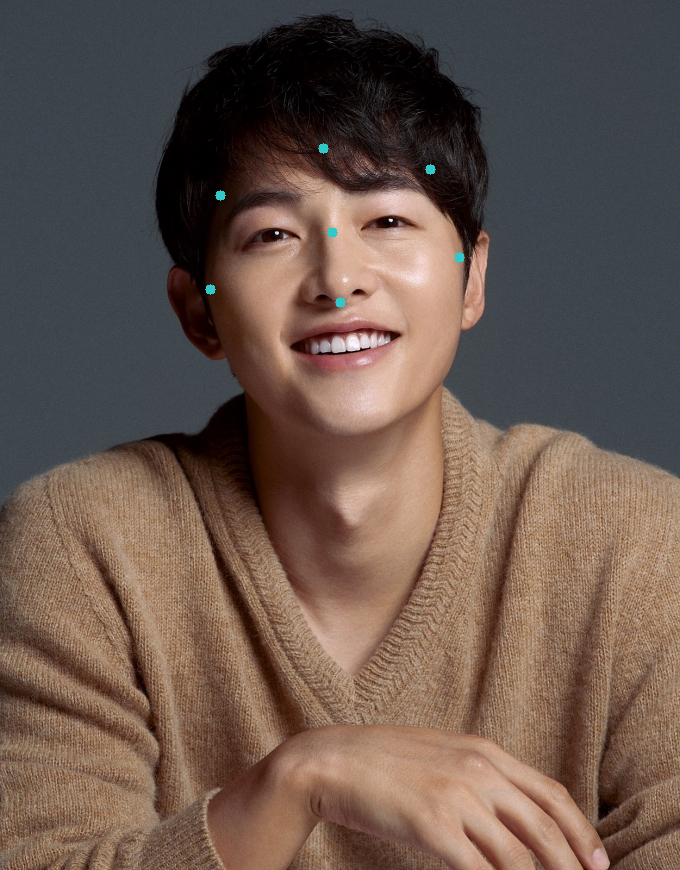

In [23]:
cv2_imshow(image)

In [ ]:
df = pd.DataFrame(mask_landmark, columns =['landmark', 'x', 'y'])

In [ ]:
df.to_csv('/content/drive/MyDrive/광인사 팀프로젝트/기업 프로젝트_여보야/21 여보야_코드/얼굴상 동물상/가면적용/cat_mask.csv', index=False)